<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [13]:
#!pip install fitter

In [1]:
import random
import numpy as np
import seaborn as sns
from fitter import Fitter, get_common_distributions, get_distributions

In [2]:
# Define the inputs and their probability distributions
inputs = {"input_1": {"mean": 10, "std_dev": 2},
          "input_2": {"mean": 20, "std_dev": 3}}

In [3]:
# Number of iterations
num_iterations = 1000

# Storage for simulation results
results = []

In [4]:
# Run the simulation
for i in range(num_iterations):
    # Generate random values for each input based on its distribution
    input_1 = np.random.normal(inputs["input_1"]["mean"], inputs["input_1"]["std_dev"])
    input_2 = np.random.normal(inputs["input_2"]["mean"], inputs["input_2"]["std_dev"])

    # Calculate the output of the model
    output = input_1**2 +input_1*input_2+ input_2**2

    # Store the result
    results.append(output)

In [5]:
# Analyze the results
mean_result = np.mean(results)
std_dev_result = np.std(results)

Mean result:  717.2310656965162
Standard deviation of result:  170.11285061019177


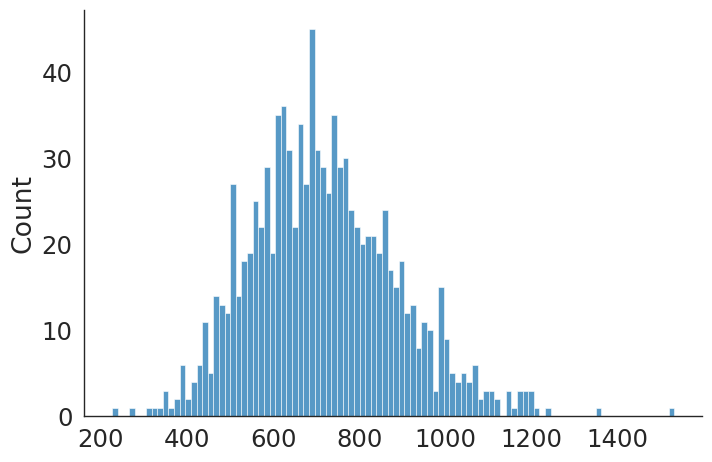

In [6]:
# Visualize the results
sns.set_style('white')
sns.set_context("paper", font_scale = 2)

sns.displot(data=results, x=results, kind="hist", bins = 100, aspect = 1.5)

# Print the results
print("Mean result: ", mean_result)
print("Standard deviation of result: ", std_dev_result)

In [7]:
f = Fitter(results,distributions=get_distributions(),timeout=60,bins=50)#,xmin=0.1, xmax=1 ) 
#get_common_distributions() ##['gamma','lognorm',"beta","burr","norm"]
f.fit()

f.summary()

Fitting 109 distributions:  26%|███▊           | 28/109 [00:04<00:32,  2.50it/s]/home/junior/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:3405: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  t1 = integrate.quad(llc, -np.inf, x)[0]
Fitting 109 distributions:  74%|███████████▏   | 81/109 [02:05<02:26,  5.25s/it]SKIPPED rv_continuous distribution (taking more than 60 seconds)
SKIPPED rv_histogram distribution (taking more than 60 seconds)
SKIPPED norminvgauss distribution (taking more than 60 seconds)
Fitting 109 distributions:  81%|████████████   | 88/109 [02:25<01:25,  4.07s/it]/home/junior/anaconda3/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1151: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
 

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
skewnorm,8.260124e-07,861.272949,-20893.688009,inf,0.012299,9.977471e-01
fatiguelife,8.277218e-07,863.573472,-20891.620731,inf,0.012033,9.983797e-01
invgamma,8.287930e-07,856.557918,-20890.327385,inf,0.012179,9.980529e-01
genhyperbolic,8.305788e-07,857.387016,-20874.359583,inf,0.122731,1.382110e-13
alpha,8.306096e-07,855.218029,-20888.137940,inf,0.016867,9.338545e-01


In [11]:
best_m=f.get_best(method = 'sumsquare_error')
best_m

{'powernorm': {'c': 0.17991120337774258,
  'loc': 514.1173194334983,
  'scale': 93.54968282371107}}

In [14]:
f.fitted_param['norm']

(713.422816844768, 170.68650037589848)

In [15]:
f = Fitter(results,distributions=get_common_distributions(),bins=50,) 
#get_common_distributions() ##['gamma','lognorm',"beta","burr","norm"]
f.fit()

f.summary()

Fitting 10 distributions:  80%|██████████████▍   | 8/10 [00:30<00:16,  8.10s/it]SKIPPED chi2 distribution (taking more than 30 seconds)
SKIPPED lognorm distribution (taking more than 30 seconds)
Fitting 10 distributions: 100%|█████████████████| 10/10 [00:30<00:00,  3.03s/it]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
gamma,8.171977e-08,871.564498,-255275.471139,inf,0.005633,9.070044e-01
norm,4.178742e-07,894.426263,-238965.838177,inf,0.022637,6.965522e-05
cauchy,5.139595e-06,806.132892,-213870.345877,inf,0.087516,4.336798e-67
rayleigh,1.210165e-05,767.405336,-205306.670837,inf,0.189420,1.175245e-314
uniform,3.434475e-05,724.120839,-194875.596115,inf,0.330853,0.000000e+00
